In [1]:
getwd()

[1] "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts"

In [2]:
library(data.table)
library(ggplot2)

# Read in the combined files
results_1 <- fread("14.1-OUT_combined_methylation_a2.csv")
results_2 <- fread("14.1-OUT_combined_cor_stats.csv")

# Set column names
setnames(results_1, c("Chr", "pos", "population", "region", "mean_DNAm", "var_DNAm"))
setnames(results_2, c("Chr", "population", "region", "pos", "cor", "mse"))


In [3]:
head(results_1)

Chr,pos,population,region,mean_DNAm,var_DNAm
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
10,45719,AA,caud,0.7874212,0.01853206
10,45811,AA,caud,0.8037671,0.01735838
10,45862,AA,caud,0.8122751,0.01678597
10,45900,AA,caud,0.8183290,0.01637150
10,45908,AA,caud,0.8195718,0.01628406
10,46295,AA,caud,0.8682497,0.01011774


In [4]:
head(results_2)

Chr,population,region,pos,cor,mse
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
10,AA,caud,110473173,0.08311743,0.0001618843
10,AA,caud,110473313,0.12900205,0.0001784047
10,AA,caud,110473381,0.07879280,0.0001863232
10,AA,caud,110473498,0.19204756,0.0002068278
10,AA,caud,110473533,0.03763789,0.0002138102
10,AA,caud,110473546,0.07425049,0.0002156510


In [5]:
object.size(results_1)

2116647120 bytes

In [6]:
object.size(results_2)

8799582952 bytes

In [7]:
# Merge the two data.tables on multiple keys
merged_data <- merge(results_1, results_2, by = c("Chr", "pos", "population", "region"))


In [8]:
# Ensure reproducibility
set.seed(123)
selected_data <- merged_data[sample(.N, 10000)]


In [9]:
library(ggplot2)

# Plot cor vs DNAm with trend line
p1 <- ggplot(selected_data, aes(x = mean_DNAm, y = cor, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "blue") +  # Adding a linear model trend line
  labs(title = "Correlation vs. Mean DNAm", x = "Mean DNAm", y = "Correlation") +
  theme_minimal()

# Plot cor vs DNAm_var with trend line
p2 <- ggplot(selected_data, aes(x = var_DNAm, y = cor, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "blue") +  # Adding a linear model trend line
  labs(title = "Correlation vs. Variance of DNAm", x = "Variance of DNAm", y = "Correlation") +
  theme_minimal()

# Plot cor vs DNAm_var on log scale with trend line
p3 <- ggplot(selected_data, aes(x = log(var_DNAm), y = cor, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "blue") +  # Adding a linear model trend line
  labs(title = "Correlation vs. Variance of DNAm (log scale)", x = "Variance of DNAm (log scale)", y = "Correlation") +
  theme_minimal()


Warning message:
“Removed 305 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 305 rows containing missing values or values outside the scale range
(`geom_point()`).”


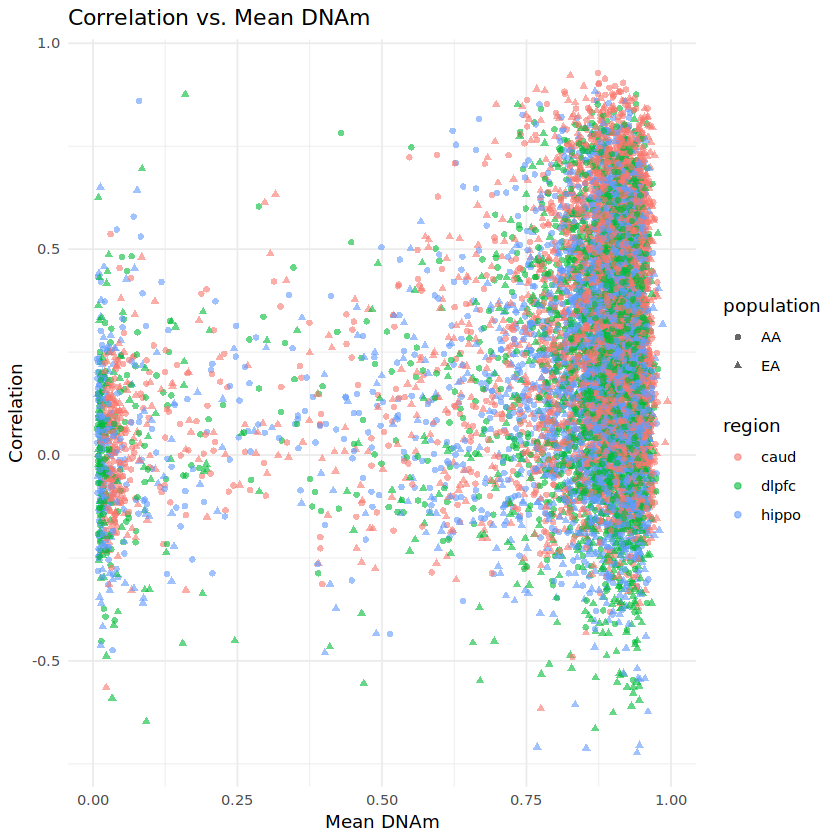

Warning message:
“Removed 305 rows containing missing values or values outside the scale range
(`geom_point()`).”


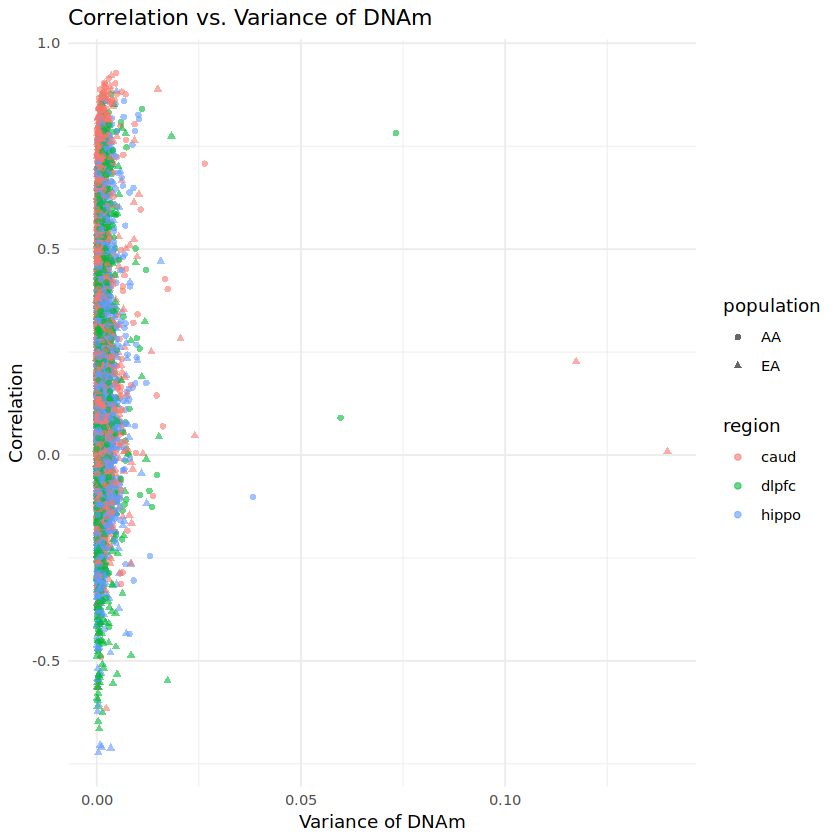

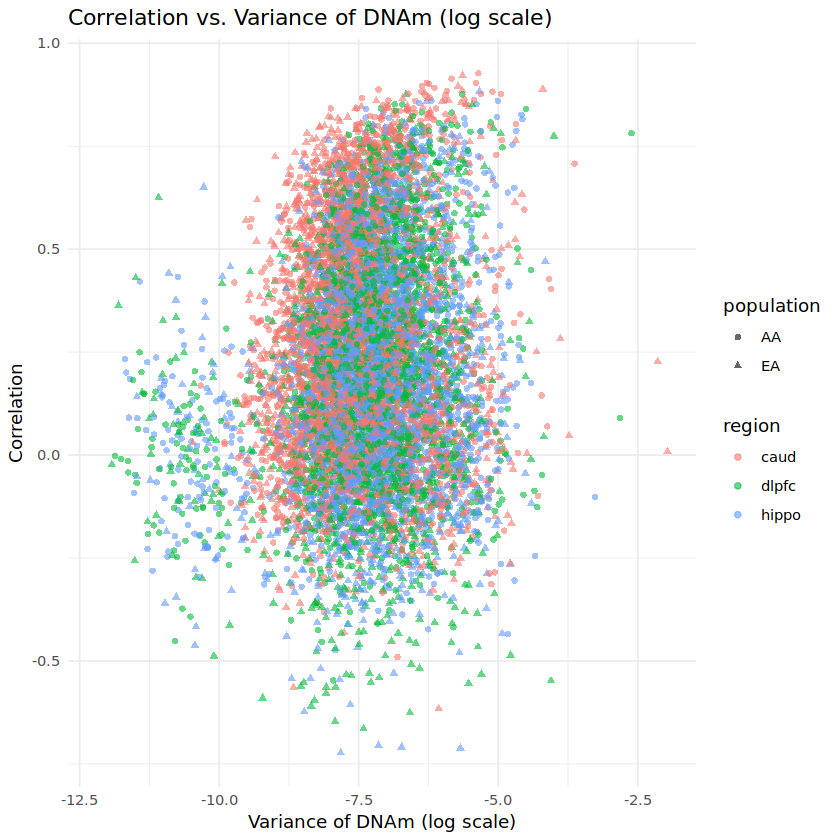

In [10]:
print(p1)
print(p2)
print(p3)

In [11]:
# Plot mse vs DNAm with trend line
p4 <- ggplot(selected_data, aes(x = mean_DNAm, y = mse, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Mean DNAm", x = "Mean DNAm", y = "MSE") +
  theme_minimal()

# Plot mse vs DNAm_var with trend line
p5 <- ggplot(selected_data, aes(x = var_DNAm, y = mse, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Variance of DNAm", x = "Variance of DNAm", y = "MSE") +
  theme_minimal()

# Plot mse vs DNAm_var on log scale with trend line
p6 <- ggplot(selected_data, aes(x = log(var_DNAm), y = mse, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Variance of DNAm (log scale)", x = "Variance of DNAm (log scale)", y = "MSE") +
  theme_minimal()


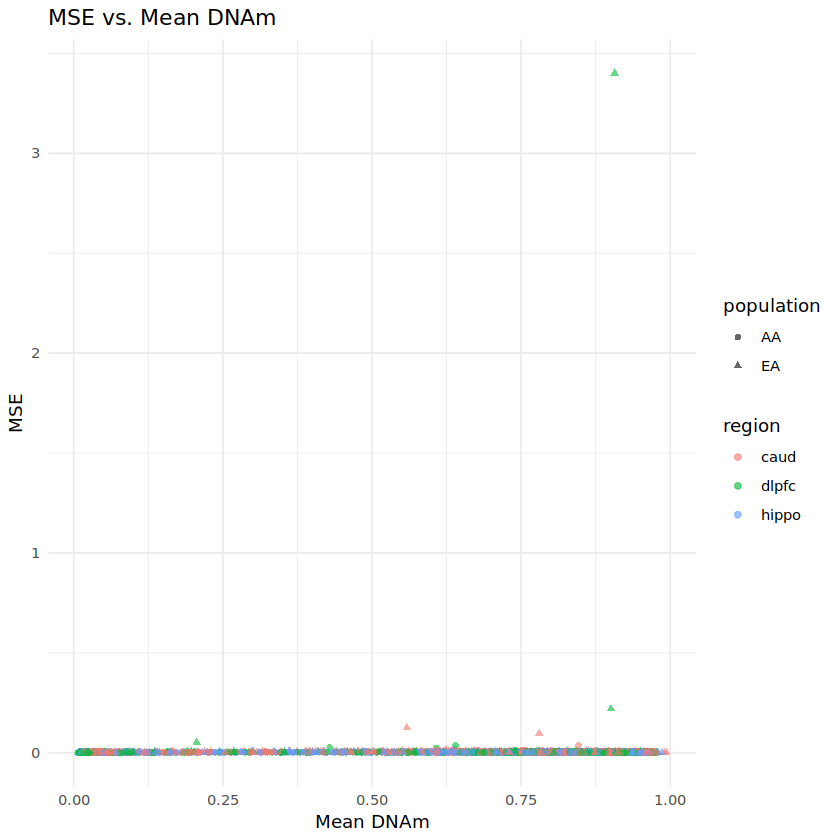

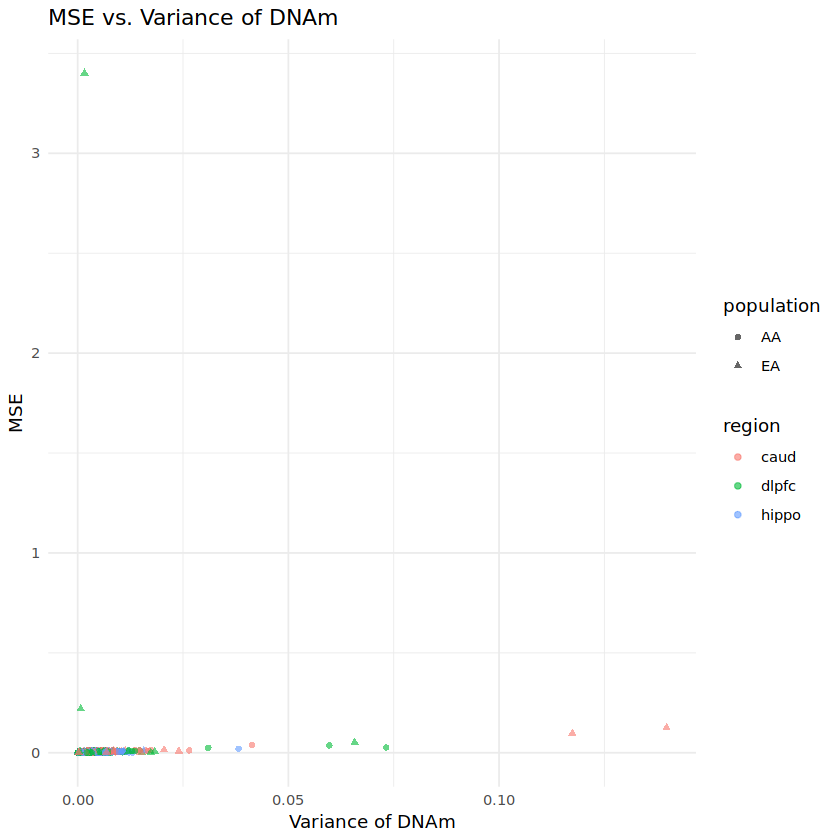

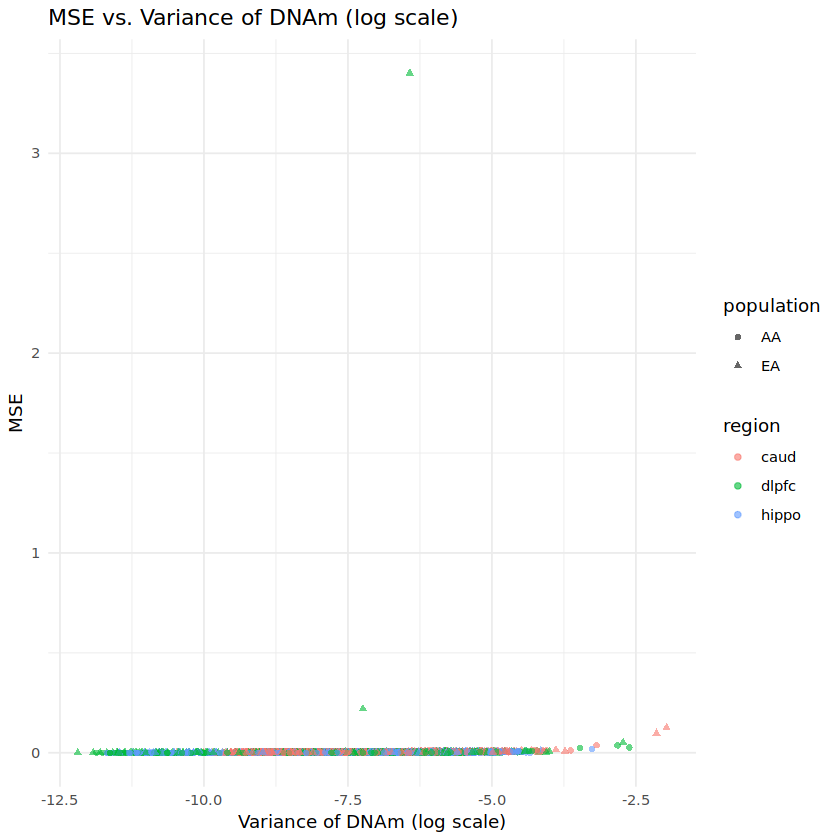

In [12]:
print(p4)
print(p5)
print(p6)

In [13]:
# Plot mse vs DNAm with trend line
p4 <- ggplot(selected_data, aes(x = mean_DNAm, y = mse, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Mean DNAm", x = "Mean DNAm", y = "MSE") +
  theme_minimal()

# Plot mse vs DNAm_var with trend line
p5 <- ggplot(selected_data, aes(x = var_DNAm, y = mse, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Variance of DNAm", x = "Variance of DNAm", y = "MSE") +
  theme_minimal()

# Plot mse vs DNAm_var on log scale with trend line
p6 <- ggplot(selected_data, aes(x = log(var_DNAm), y = mse, color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Variance of DNAm (log scale)", x = "Variance of DNAm (log scale)", y = "MSE") +
  theme_minimal()


In [14]:
# Plot mse (log scale) vs DNAm_var with trend line
p7 <- ggplot(selected_data, aes(x = var_DNAm, y = log(mse), color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Variance of DNAm", x = "Variance of DNAm (log scale)", y = "MSE") +
  theme_minimal()


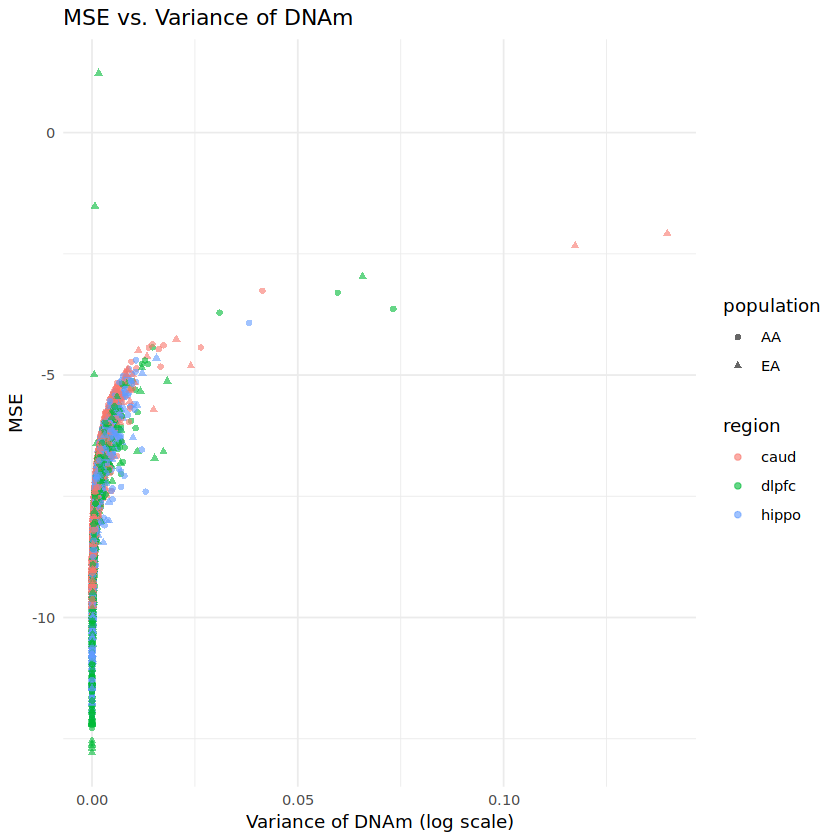

In [15]:
print(p7)

In [16]:
# Plot mse (log scale) vs DNAm_var with trend line
p7 <- ggplot(selected_data, aes(x = var_DNAm, y = log(mse), color = region, shape = population)) +
  geom_point(alpha = 0.6) +
  #geom_smooth(method = "lm", color = "red") +  # Adding a linear model trend line
  labs(title = "MSE vs. Variance of DNAm (truncated)", x = "Variance of DNAm (log scale)", y = "MSE") +
  theme_minimal() +
  ylim(c(-12, -2)) +
  xlim(c(0, 0.02))


Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”


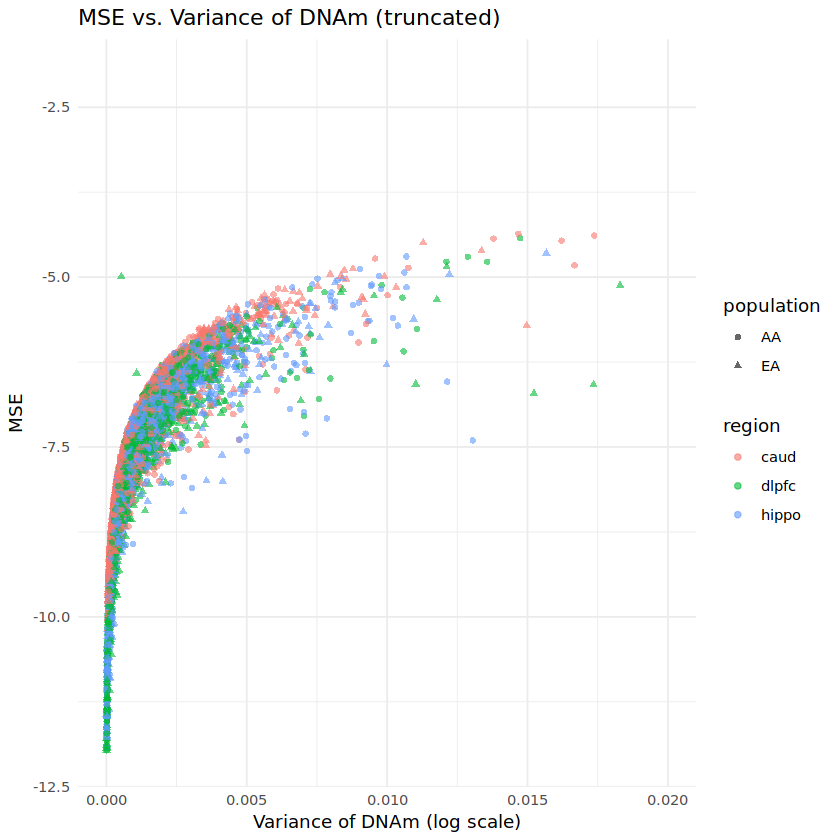

In [17]:
print(p7)